In [ ]:
import cdms
import numpy as np
import matplotlib.pyplot as plt
import pandas
%matplotlib inline

# plot raw pulse
from rawio.IO import *

In [ ]:
def low_pass_filter(data, alpha):
    """
    Applies a simple low-pass filter to a data series.

    :param data: a list or array of numeric data
    :param alpha: a smoothing factor between 0 and 1
    :return: a list containing the filtered data
    """
    filtered = [data[0]]  # initialize the filtered data with the first value of the input
    for i in range(1, len(data)):
        filtered.append(alpha * data[i] + (1 - alpha) * filtered[-1])
    return filtered

#filenames = ['23230511_224414_F0003.mid.gz', ]

In [ ]:
series = '23230512_013340'
#filepath = '/home/o/oser/yanliu/data/raw'
filepath = '/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R33/Raw/' + series + '/'
#filename = '23230511_224414_F0003.mid.gz'
filename = series+ '_F0003.mid.gz'
#filename = '23230511_225934_F0003.mid.gz'
#filename = '23230511_231440_F0003.mid.gz'
#filename = '23230511_232951_F0003.mid.gz'
#filename = '23230511_234637_F0003.mid.gz'
#filename = '23230512_000132_F0003.mid.gz'
#filename = '23230512_001623_F0003.mid.gz'
#filename = '23230512_003248_F0003.mid.gz'
#filename = '23230512_004757_F0003.mid.gz'
#filename = '23230512_010249_F0003.mid.gz'
#filename = '23230512_011822_F0003.mid.gz'
#filename = '23230512_013340_F0003.mid.gz'

traces = getRawEvents(filepath, filename)
eventInfo = getEventInfo(filepath, filename)

chan_names = ['PAS1', 'PBS1', 'PCS1', 'PDS1', 'PES1', 'PFS1', 'PAS2', 'PBS2', 'PCS2', 'PDS2', 'PES2', 'PFS2']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'darkorange', 'limegreen', 'steelblue', 'purple', 'olive']
#eventNumber = 10004



In [ ]:
#eventInfo

In [ ]:
# retrieve tracelength
#tracelength = len(traces['Z4']['PAS1'][seriesNumber][30006])
tracelength = 31264
print (tracelength)

#seriesNumber = 23230511224414
seriesNumber = series[:8] + series[9:]
seriesNumber = series.replace('_', '')
seriesNumber = int(series)

eventNumbers = []

for event in eventInfo:
    veto_readout = event.get('trigger_veto', {}).get('Z4', {}).get('ReadoutStatus')
    if veto_readout == 1.0:
        eventNumbers.append(event['event']['EventNumber'])

print(len(eventNumbers))
#print(eventNumbers)

In [ ]:
#eventNumbers = [3000, 30015]

#with open('eventlist.txt', 'r') as f:
#    for line in f:
#        eventNumbers.append(int(line.strip()))

#eventNumbers = eventNumbers[:100]

#print(eventNumbers)

avg_traces = np.zeros((12,tracelength))

for i in range(0, 12):
    for eventNumber in eventNumbers:
        avg_traces[i] += traces['Z4'][chan_names[i]][seriesNumber][eventNumber][:]

avg_traces /= len(eventNumbers)  # Divide each sum by the number of events to calculate the average

In [ ]:
# plotting
fig, ax = plt.subplots(figsize=(8, 6))

baseline = 32630
for i in range(5, 6):
    #if i == 2:
        #continue  # Skip plotting for i == 3
        #avg_traces[i][:] = (avg_traces[i][:]-baseline)*0.01 + baseline
    ax.plot(avg_traces[i][:], label=chan_names[i], color=colors[i])
    
ax.set_title(str(seriesNumber) + " Average Traces, 1% scale on the test signal channel" )
#plt.ylim(32655, 32670)
ax.legend()
plt.show()

In [ ]:
# plot time domain
#fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 8))
#plt.subplots_adjust(top=0.88, hspace=0.4)  # Adjust top spacing and add extra vertical space

#for i in range(12):
    #if i == 3:
    #    continue  # Skip plotting for i == 3
#    row = i // 3
#    col = i % 3
#    axes[row, col].plot(avg_traces[i][:], label=chan_names[i], color=colors[i], )
#    ax.ticklabel_format(style='plain', axis='both')
#    axes[row, col].set_title(str(seriesNumber) + " " + chan_names[i])

##fig.suptitle(str(seriesNumber) + " Average Traces")
##plt.subplots_adjust(top=0.88)  # Adjust the top spacing between suptitle and subplots
#plt.tight_layout()
#plt.show()

In [ ]:
# noise PSD
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8, 8))
plt.subplots_adjust(top=0.88, hspace=0.4)  # Adjust top spacing and add extra vertical space

for i in range(0, 12):
    row = i // 3
    col = i % 3
    fft_vals = np.fft.fft(avg_traces[i][:])  # Compute FFT
    squared_spectrum = fft_vals * np.conjugate(fft_vals)  # Calculate squared spectrum
    freq = np.fft.fftfreq(len(avg_traces[i][:]))  # Frequency values
    #axes[row, col].plot(freq[:15632], squared_spectrum[:15632], label=chan_names[i], color=colors[i])
    axes[row, col].plot(freq[:15632], squared_spectrum[:15632], label=chan_names[i], color=colors[i])
    axes[row, col].set_title(str(seriesNumber) + " " + chan_names[i])
    axes[row, col].set_xscale('log')  # Set x-axis to logarithmic scale
    axes[row, col].set_yscale('log')  # Set y-axis to logarithmic scale

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

for i in range(0, 12):
    fft_vals = np.fft.fft(avg_traces[i][:])  # Compute FFT
    squared_spectrum = fft_vals * np.conjugate(fft_vals)  # Calculate squared spectrum
    freq = np.fft.fftfreq(len(avg_traces[i][:])) * 625000  # Frequency values
    ax.plot(freq[:15632], squared_spectrum[:15632], label=chan_names[i], color=colors[i])

ax.set_title(str(seriesNumber) + " Noise PSD")
ax.set_xscale('log')  # Set x-axis to logarithmic scale
ax.set_yscale('log')  # Set y-axis to logarithmic scale
ax.set_xlabel('Hz')  # Add x-axis label
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
#get_full_odb(filepath, '23230426_095647_F0009.mid.gz')

#getDetectorSettings(filepath, '23230426_095647_F0009.mid.gz')

#getEventInfo(filepath, '23230426_095647_F0009.mid.gz')

#getDetectorChannelMap(filepath, '23230426_095647_F0009.mid.gz')

# Baseline

In [ ]:
filepath = '/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R33/Raw/23230511_224414/'
filename = '23230511_224414_F0001.mid.gz'

In [ ]:
BORR_traces = getRawEvents(filepath, filename)
BORR_eventInfo = getEventInfo(filepath, filename)

In [ ]:
BORR_eventInfo

# 10001, 10003

In [ ]:
print (sum(BORR_traces['Z4']['PDS1'][23230511224414][10001][16500:17000])/500)


# Comparison between different test signal amplitudes (linearity check of the cross-talk)
# And also
# Comparison between different states of other channels (s/c, transition, normal)

In [2]:
import cdms
import numpy as np
import matplotlib.pyplot as plt
import pandas
%matplotlib inline

# plot raw pulse
from rawio.IO import *

In [43]:
#series = '23230512_003248' #(200 mV)
#series = '23230512_015832' #(400 mV)
#series = '23230512_021315' #(50 mV)

series = '23230512_104512' # 

#filepath = '/home/o/oser/yanliu/data/raw'
filepath = '/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R33/Raw/' + series + '/'
filename = series+ '_F0003.mid.gz'


traces = getRawEvents(filepath, filename)
eventInfo = getEventInfo(filepath, filename)

chan_names = ['PAS1', 'PBS1', 'PCS1', 'PDS1', 'PES1', 'PFS1', 'PAS2', 'PBS2', 'PCS2', 'PDS2', 'PES2', 'PFS2']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'darkorange', 'limegreen', 'steelblue', 'purple', 'olive']

The file is: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R33/Raw/23230512_104512//23230512_104512_F0003.mid.gz

Opened raw midas file: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R33/Raw/23230512_104512//23230512_104512_F0003.mid.gz
The file is: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R33/Raw/23230512_104512//23230512_104512_F0003.mid.gz

Opened raw midas file: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R33/Raw/23230512_104512//23230512_104512_F0003.mid.gz
The file is: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R33/Raw/23230512_104512//23230512_104512_F0003.mid.gz

Opened raw midas file: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R33/Raw/23230512_104512//23230512_104512_F0003.mid.gz
The file is: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R33/Raw/23230512_104512//23230512_104512_F0003.mid.gz

Opened raw midas file: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R33/Raw/23230512_104512//23230512_104512_F0003.mid.gz


In [12]:
# retrieve tracelength
tracelength = len(traces['Z4']['PAS1'][23230512043215][30015])
print (tracelength)
#traces

6256


In [44]:
tracelength = 31264
#tracelength = 6256
print (tracelength)

seriesNumber = series[:8] + series[9:]
seriesNumber = series.replace('_', '')
seriesNumber = int(series)

eventNumbers = []

for event in eventInfo:
    veto_readout = event.get('trigger_veto', {}).get('Z4', {}).get('ReadoutStatus')
    if veto_readout == 1.0:
        eventNumbers.append(event['event']['EventNumber'])

print(len(eventNumbers))
#print(eventNumbers)

31264
746


In [58]:
avg_traces = np.zeros((12,tracelength))

for i in range(0, 12):
    for eventNumber in eventNumbers:
        avg_traces[i] += traces['Z4'][chan_names[i]][seriesNumber][eventNumber][:]

avg_traces /= len(eventNumbers)  # Divide each sum by the number of events to calculate the average

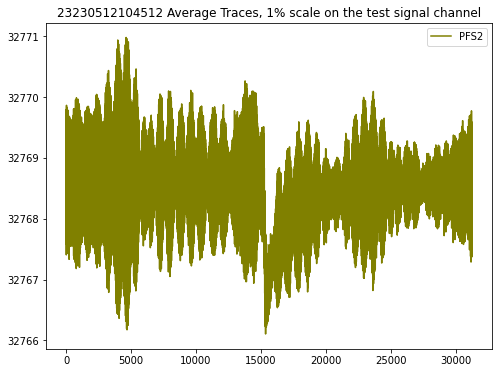

In [69]:
# plotting
fig, ax = plt.subplots(figsize=(8, 6))

baseline = 32760
for i in range(11,12):
    #if i == 10:
        #continue  # Skip plotting for i == 3
        #avg_traces[i][:] = (avg_traces[i][:]-baseline)*0.01 + baseline
    ax.plot(avg_traces[i][:], label=chan_names[i], color=colors[i])
    
ax.set_title(str(seriesNumber) + " Average Traces, 1% scale on the test signal channel" )
#plt.ylim(32750, 32770)
ax.legend()
plt.show()

/sdf/home/y/yanliu/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


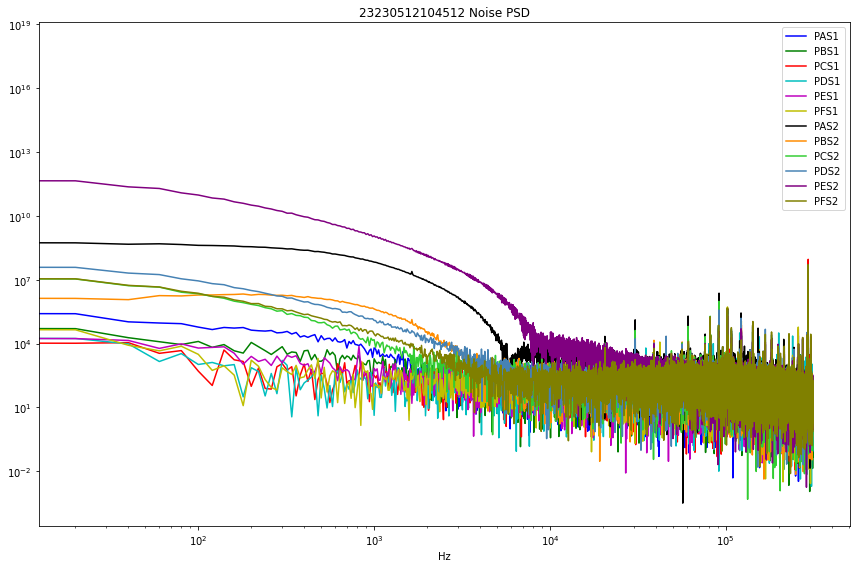

In [47]:
fig, ax = plt.subplots(figsize=(12, 8))

for i in range(0, 12):
    fft_vals = np.fft.fft(avg_traces[i][:])  # Compute FFT
    squared_spectrum = fft_vals * np.conjugate(fft_vals)  # Calculate squared spectrum
    freq = np.fft.fftfreq(len(avg_traces[i][:])) * 625000  # Frequency values
    ax.plot(freq[:15632], squared_spectrum[:15632], label=chan_names[i], color=colors[i])

ax.set_title(str(seriesNumber) + " Noise PSD")
ax.set_xscale('log')  # Set x-axis to logarithmic scale
ax.set_yscale('log')  # Set y-axis to logarithmic scale
ax.set_xlabel('Hz')  # Add x-axis label
ax.legend()

plt.tight_layout()
plt.show()

# Get QET bias information

In [1]:
import cdms
import numpy as np
import matplotlib.pyplot as plt
import pandas
%matplotlib inline

# plot raw pulse
from rawio.IO import *

In [15]:
series = '23230512_034154' # 

#filepath = '/home/o/oser/yanliu/data/raw'
filepath = '/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R33/Raw/' + series + '/'
filename = series+ '_F0003.mid.gz'


#traces = getRawEvents(filepath, filename)
#eventInfo = getEventInfo(filepath, filename)

In [3]:
eventInfo

[{'event': {'SeriesNumber': 23230511231440,
   'EventNumber': 30000,
   'EventTime': 1683861877,
   'TriggerType': 1,
   'ReadoutType': 0,
   'NumTriggers': 1,
   'PollingEndTime': 0.0,
   'SIMSeriesNumber': 0,
   'SIMRecoilEnergy': 0.0,
   'SIMAvgX': 0.0,
   'SIMAvgY': 0.0,
   'SIMAvgZ': 0.0},
  'trigger': {'TriggerTime': 4405.2405663,
   'TriggerDetNum': 4,
   'TriggerStatus': 1,
   'TriggerAmplitude': 4,
   'TriggerUnixTime': 1683861875,
   'TriggerNums': 1,
   'TriggerWord': 0,
   'TriggerMask': 1},
  'trigger_veto': {}},
 {'event': {'SeriesNumber': 23230511231440,
   'EventNumber': 30001,
   'EventTime': 1683861877,
   'TriggerType': 1,
   'ReadoutType': 0,
   'NumTriggers': 1,
   'PollingEndTime': 0.0,
   'SIMSeriesNumber': 0,
   'SIMRecoilEnergy': 0.0,
   'SIMAvgX': 0.0,
   'SIMAvgY': 0.0,
   'SIMAvgZ': 0.0},
  'trigger': {'TriggerTime': 4405.2627887,
   'TriggerDetNum': 4,
   'TriggerStatus': 1,
   'TriggerAmplitude': 4,
   'TriggerUnixTime': 1683861875,
   'TriggerNums': 1,
  

In [16]:
#get_full_odb(filepath, '23230426_095647_F0009.mid.gz')

detSettings = getDetectorSettings(filepath, filename)

#getEventInfo(filepath, '23230426_095647_F0009.mid.gz')

#getDetectorChannelMap(filepath, '23230426_095647_F0009.mid.gz')

The file is: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R33/Raw/23230512_034154//23230512_034154_F0003.mid.gz

Opened raw midas file: /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R33/Raw/23230512_034154//23230512_034154_F0003.mid.gz
INFO in DetectorConfigData: list of available detectors = 4


In [17]:
detSettings

{'Z4': {'PFS1': {'Tower': 1.0,
   'binsPerTrace': 31264.0,
   'binsPerTraceOn': 31264.0,
   'binsPerTracePost': 0.0,
   'binsPerTracePre': 0.0,
   'downSamplingFactor': 16.0,
   'driverGain': 1.0,
   'isEnabled': 1.0,
   'ishybrid': 0.0,
   'phononOffset': -0.03306199982762337,
   'qetBias': 0.0,
   'squidBias': 1.899930953979492e-05,
   'squidLockPoint': 0.0022173120975494385,
   'timePerBin': 1.6e-06,
   'timePerBinLow': 2.56e-05,
   'triggerTime': 0.0,
   'variableGain': -4.960629940032959,
   'channelNum': 0,
   'pNum': 0,
   'detectorCode': 710004000},
  'PCS1': {'Tower': 1.0,
   'binsPerTrace': 31264.0,
   'binsPerTraceOn': 31264.0,
   'binsPerTracePost': 0.0,
   'binsPerTracePre': 0.0,
   'downSamplingFactor': 16.0,
   'driverGain': 1.0,
   'isEnabled': 1.0,
   'ishybrid': 0.0,
   'phononOffset': -0.0209693294018507,
   'qetBias': 0.0,
   'squidBias': 1.9000799179077148e-05,
   'squidLockPoint': 0.0021288089752197264,
   'timePerBin': 1.6e-06,
   'timePerBinLow': 2.56e-05,
   't